# Predictive Model

In [93]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [94]:
# get current working directory

df = pd.read_csv("/Users/vineetjujjavarapu/Downloads/customer_booking.csv", encoding="ISO-8859-1")


In [95]:
df = df.reset_index(drop=True)

In [96]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


We will one hot encode the categorical columns.

In [97]:
df_final = df

In [98]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)



In [99]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route','flight_day'], axis=1, inplace = True)

In [100]:
#store the label for supervised learning
label = df['booking_complete']

In [101]:
df_final = df_final.drop('booking_complete', axis=1)

In [102]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [103]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [104]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [105]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [106]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


## Correlation matrix


<Axes: >

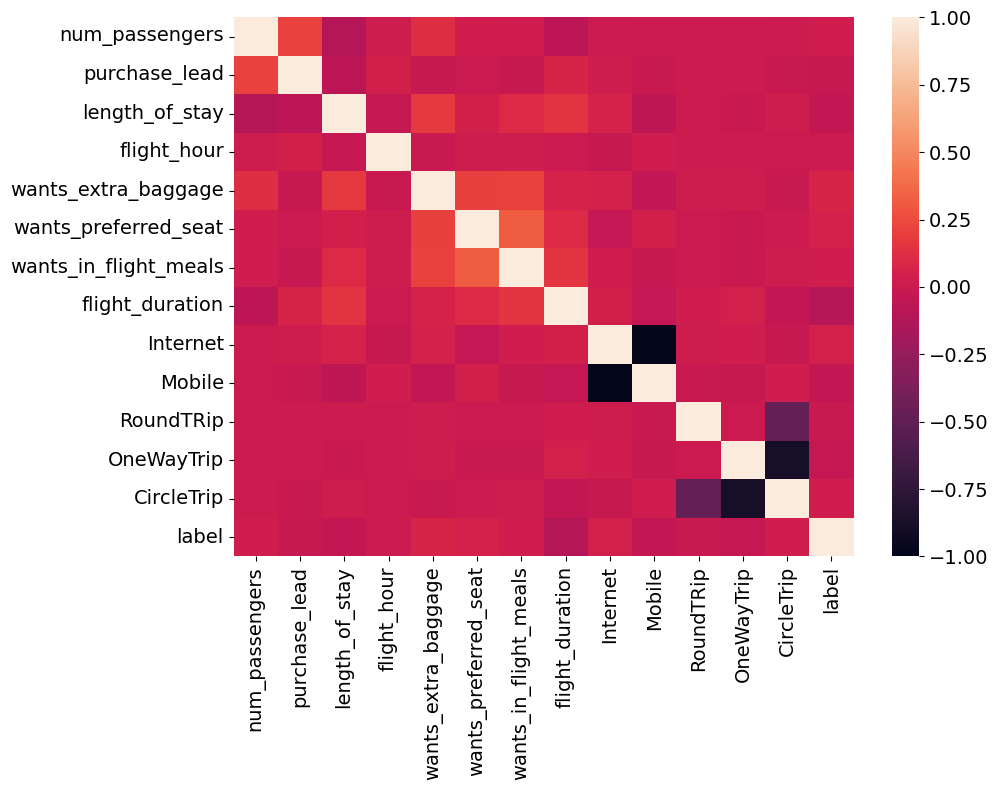

In [107]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

Now let's split the dataset into train and test sets.

## Splitting Train and Test Data

In [108]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [109]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [110]:

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Random Forest Classifier

In [111]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)


### Checking Training accuracy

In [112]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} {recall_score(y_train,y_pred_train)}respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.7 0.541513837945982respectively


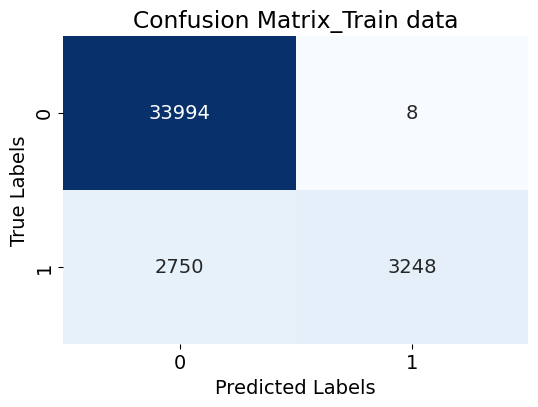

In [113]:

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix_Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Checking Testing accuracy

In [114]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)


print(f"Accuracy, precision, f1-score and recall for training data are {acc}, {pre},{f1} and {recall} respectively")

Accuracy, precision, f1-score and recall for training data are 0.85, 0.4,0.09 and 0.05 respectively


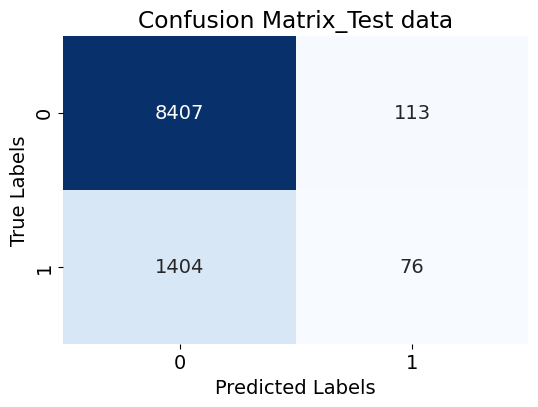

In [115]:

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix_Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

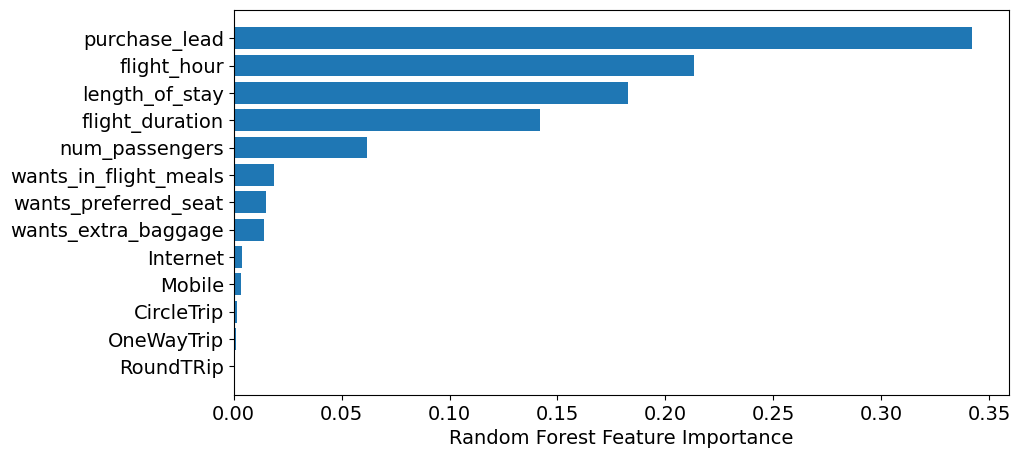

In [116]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")